In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#Road to DTW - A brief history of Cost

First step we need for dynamic time warping is a cost matrix which is a cost function applied to every pair of two vectors of equal or different length. Let's look at a few way of doing this and see which one we should be using.

Just for fun, let's start with a pure python implementation. We know what to expect, much worst performance than what we will be doing later on.

In [38]:
import math

In [39]:
import random

In [109]:
# We'll give ourselves two vectors of different length
X = [math.sin(i/100.) for i in range(1000)]
Y = [math.cos(i/100.) for i in range(500)]

The easiest cost function would be to take the absolute value of the pairwise differences

In [110]:
%%time
pure_python_cost_matrix = []
for x in X:
    row = []
    for y in Y:
        row.append(abs(x-y))
    pure_python_cost_matrix.append(row)

CPU times: user 131 ms, sys: 7.23 ms, total: 138 ms
Wall time: 139 ms


Let's move on to numpy, the defacto choice for numerical array and computation. It is much faster due to the vectorization of computation and its memory footprint.<br>
Here I will deliberatly be taking a slower route to see the improvements vectorization can yield.

In [111]:
import numpy as np

In [112]:
# We'll convert our two arrays to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [113]:
%%time
hybrid_numpy_cost_matrix = []
for y in Y:
    hybrid_numpy_cost_matrix.append(np.abs(X-y))

CPU times: user 2.99 ms, sys: 975 µs, total: 3.97 ms
Wall time: 3.56 ms


Now that is nice. We improved the time by a factor of about 37. Really good gain. Let's see if we can improve on that with meshgrid.

In [114]:
XX, YY = np.meshgrid(X, Y)

In [115]:
%%time
pure_numpy_cost_matrix = np.abs(XX-YY)

CPU times: user 2.69 ms, sys: 2.01 ms, total: 4.69 ms
Wall time: 3.53 ms


With a pure numpy we improved again by a factor of about 1.3 and a wooping 50 times over the pure python implementation.

Let's just make sure that all our results are equals

In [116]:
# Just have to put convert the pure python cost matrix in numpy to make it easier to compare the matrices
# Pure python VS Pure Numpy
(np.array(pure_python_cost_matrix).T == pure_numpy_cost_matrix).all()

True

In [117]:
# Hybrid VS Pure Numpy
(np.array(hybrid_numpy_cost_matrix) == pure_numpy_cost_matrix).all()

True

In [118]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

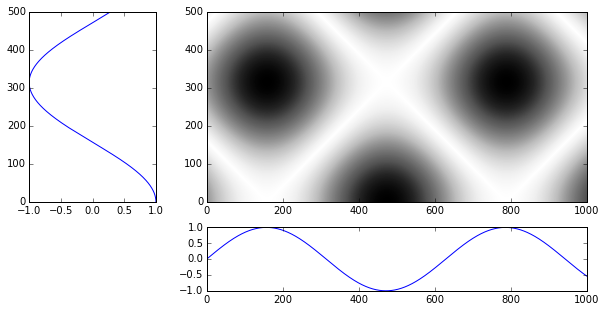

In [119]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
ax = plt.subplot(gs[0,1])
axl = plt.subplot(gs[0,0], sharey=ax)
axb = plt.subplot(gs[1,1], sharex=ax)

ax.imshow(pure_numpy_cost_matrix, origin='lower', extent=(0,1000,0,500), aspect='auto', cmap='Greys')

axl.plot(Y, range(500))
axb.plot(range(1000), X)

# plt.imshow(pure_numpy_cost_matrix, cmap='Greys')

It's not telling much right now, but in the next section we'll start seeing what dynamic time warping is about

In [ ]:
range?